In [1]:
from modules.graph_functions import *
import matplotlib.pyplot as plt
import networkx as nx
import itertools as it

In [6]:
N = 16
r = 5
iter_outer = 10000

In [7]:
ans = []
for i in range(iter_outer):
    adj_mat = adjacency_matrix_regular(N,r)
    buf = True
    for state in it.combinations(np.arange(N),r):
        G = generate_graph(N, adj_mat)
        G.set_rules(spread,disconnect)
        genereate_given_state(G,state)
        if not G.simplify():
            buf = False
            break
    if buf:
        ans.append(adj_mat)
        
print(len(ans))

0


In [54]:
ans = 0
min_ns = np.inf
for i in range(iter_outer):
    adj_mat = adjacency_matrix_regular(N,r)
    buf = 0
    for state in it.combinations(np.arange(N),r):
        G = generate_graph(N, adj_mat)
        G.set_rules(spread,disconnect)
        genereate_given_state(G,state)
        if not G.simplify():
            buf+=1
    if buf < min_ns:
        ans = adj_mat
        min_ns = buf
print(ans,min_ns)

[[0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0.]
 [1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]
 [0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1.]
 [1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0.]
 [1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0.]] 0


min bipartitions !note that number of all possible partitions also decreases with N, so it better to look at the relations
(6,4) : 15
(7,4) : 35
(8,4) : 44
(9,4) : 44
(10,4) : 25
(11,4) : 7 
(12,4) : 2
(13,4) : 0
(14,4) : 0

(12,3) : 6725/10000
(12,4) : 8 / 10000 
(13,4) : 14/10000
(14,4) : 77/10000

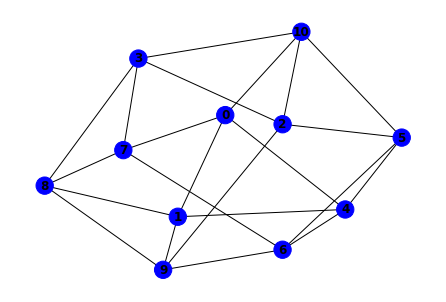

In [36]:
G = generate_graph(N, ans)
G.plot_graph()

In [33]:
not_simp = []
for state in it.combinations(np.arange(N),r):
        G = generate_graph(N, ans)
        G.set_rules(spread,disconnect)
        genereate_given_state(G,state)
        if not G.simplify():
            not_simp.append(state)
print(not_simp)

[(0, 2, 6, 8), (0, 2, 9, 10), (0, 3, 5, 9), (1, 2, 5, 7), (1, 3, 6, 10), (4, 6, 7, 8), (4, 7, 9, 10)]


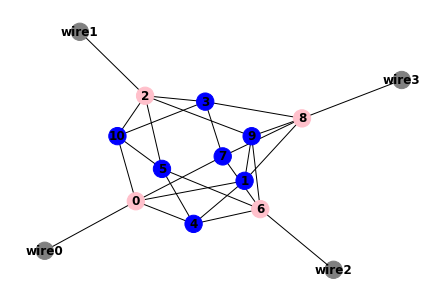

In [34]:
G = generate_graph(N, ans)
G.set_rules(spread,disconnect)
genereate_given_state(G,not_simp[0])
G.plot_graph()

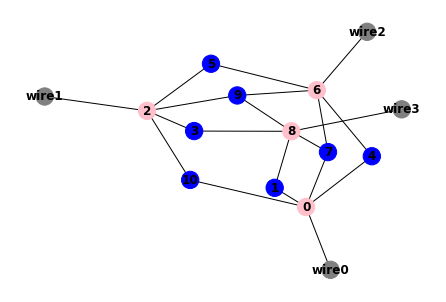

In [35]:
G.simplify()
G.plot_graph()